# Problem Statement

Membua segmentasi Customer dari data kartu kredit bank. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

~~~sql
SELECT *  
FROM `ftds-hacktiv8-project.phase1_ftds_002_hck.credit-card-information`
WHERE MOD(CUST_ID,2) = 0
~~~

Dataset Description

|            **Feature**           |                      **Explanation**                      |  **Measurement** |         **Range**        |
|:-------------------------------- |:--------------------------------------------------------- |:---------------- |:------------------------ |
|              CUST_ID             | Identification of credit card holder                      |     Id number    | Unique                   |
|              BALANCE             | Balance amount left in their account to make purchases    |        USD       | [0 - 18495.55855]        |
|         BALANCE_FREQUENCY        | How frequently the Balance is updated                     |      Boolean     | 0/1                      |
|             PURCHASES            | Amount of purchases made from account                     |        USD       | [0 - 41050.4]            |
|         ONEOFF_PURCHASES         | Maximum purchases amount done in one-go                   |        USD       | [0 - 40624.06]           |
|       INSTALLMENTS_PURCHASES     | Amount of purchases done in installment                   |        USD       | [0 - 14686.1]            | 
|           CASH_ADVANCE           | Cash in advance given by the user                         |        USD       | [0 - 47137.21176]        |
|       PURCHASES_FREQUENCY        | How frequently the Purchases are being made               |      Boolean     | 0/1                      |
|    ONEOFF_PURCHASES_FREQUENCY    | How frequently purchases are happening in one-go          |      Boolean     | 0/1                      |
| PURCHASES_INSTALLMENTS_FREQUENCY | How frequently purchases in installment are being done    |      Boolean     | 0/1                      |
|      CASH_ADVANCE_FREQUENCY      | How frequently the cash in advance being paid             |     Percentage   | [0 - 1]                  |
|         CASH_ADVANCE_TRX         | Number of transactions made with 'Cash in Advanced'       |       Count      | [0 - 123]                |
|           PURCHASES_TRX          | Number of purchases transactions made                     |       Count      | [0 - 347]                |
|           CREDIT_LIMIT           | Limit of credit card or user                              |        USD       | [50 - 30,000]            |
|             PAYMENTS             | Amount of payment done by user                            |        USD       | [0 - 50721.48336]        |
|         MINIMUM_PAYMENTS         | Minimum of payment made by user                           |        USD       | [0.019163 - 76406.20752] |
|        PRC_FULL_PAYMENTS         | Percent of full payments made by user                     |     Percentage   | [0 - 1]                  |
|              TENURE              | Tenure of credit card service for user                    |       Months     | [6 - 12]                 |

## Import Libraries

Import Library yang dibutuhkan

In [ ]:
!pip install feature_engineimport pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pylab as pl
from sklearn.metrics import silhouette_samples,davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.ticker import FixedLocator, FixedFormatter
warnings.filterwarnings('ignore')

## Data Loading

Import dataset yang dibutuhkan dan melakukan sedikit overview data

In [ ]:
df = pd.read_csv('/content/h8dsft_P1G4_ananta_sophan.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


In [ ]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [ ]:
df.shape

(4475, 18)

In [ ]:
df.isnull().sum().sum()

159

In [ ]:
df[df.duplicated()].shape

(0, 18)

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4476.000000,2583.931114,2.000000,2239.000000,4476.000000,6713.000000,8950.000000
BALANCE,4475.0,1565.743939,2091.205727,0.000000,132.536353,874.905296,2058.519163,19043.138560
BALANCE_FREQUENCY,4475.0,0.877608,0.235604,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,4475.0,1003.158324,2210.812899,0.000000,40.065000,362.480000,1122.640000,49039.570000
ONEOFF_PURCHASES,4475.0,588.504849,1666.500287,0.000000,0.000000,29.990000,580.320000,40761.250000
INSTALLMENTS_PURCHASES,4475.0,415.025075,927.360842,0.000000,0.000000,89.450000,484.255000,22500.000000
CASH_ADVANCE,4475.0,973.453671,2133.464502,0.000000,0.000000,0.000000,1098.569962,29282.109150
PURCHASES_FREQUENCY,4475.0,0.490122,0.399874,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202614,0.298502,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.364989,0.397336,0.000000,0.000000,0.166667,0.750000,1.000000


Setelah dilakukan pengecekan data, dapat dilihat tidak ada duplikasi data dalam data kartu kredit ini, namun ada total 159 Missing Values yang nantinya akan dibersihkan dalam section data cleaning

## Data Cleaning

Membuat copy data untuk diolah agar tidak mengganggu dataset yang asli

In [ ]:
df_clean = df.copy()

menghapus missing values pada dataset

In [ ]:
df_clean.drop_duplicates(inplace=True)

In [ ]:
df_clean.dropna(inplace = True)

Pada kasus kali ini yang merupakan kasus clustering, menurut asumsi saya kolom yang merupakan kolom kategorikal tidak dibutuhkan dalam kasus ini, sehingga saya akan membuang kolom 'Tenure'. Untuk kolom 'CUST_ID', saya juga membuang kolom tersebut dikarenakan kolom tersebut hanya merupakan index dan tidak mempunyai pengaruh apa-apa.

In [ ]:
df_clean.drop(['CUST_ID','TENURE'],axis =1, inplace = True)

## Exploratory Data Analysis

Membuat Fungsi untuk melihat Distribusi data pada setiap kolom dan melihat Outlier dengan Boxplot

In [ ]:
def plot_dist(df_clean, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

# histogram
    sns.histplot(df_clean[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df_clean[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df_clean[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

# boxplot
    if df_clean[col].skew() >= 1 or df_clean[col].skew() <= -1 :
        sns.boxplot(y=df_clean[col], ax =  axes[1], whis=3)
        axes[1].set_title(f"Boxplot '{col}'")
    
        plt.show()
    else:
        sns.boxplot(y=df_clean[col], ax =  axes[1], whis=1.5)
        axes[1].set_title(f"Boxplot '{col}'")
    
        plt.show()
        
# skewness
    print(df_clean[col].name + ' Skewness: ' + str(df_clean[col].skew()))
    if -0.5 <= df_clean[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df_clean[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df_clean[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

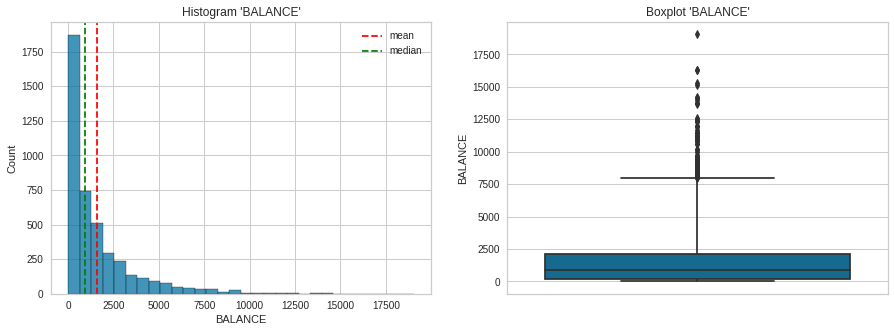

BALANCE Skewness: 2.440901091038025
Columns 'BALANCE' right skewed


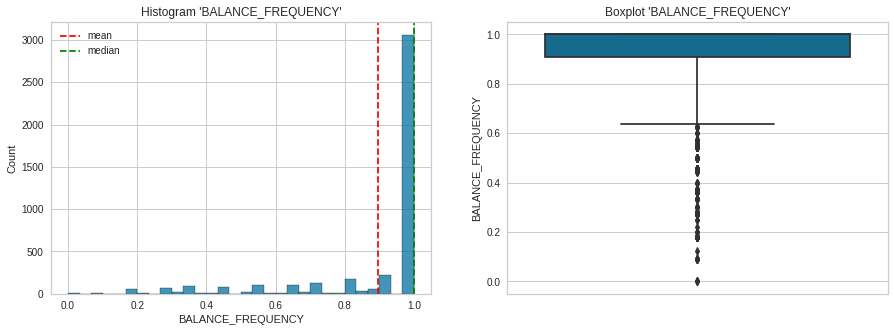

BALANCE_FREQUENCY Skewness: -2.083168233926595
Columns 'BALANCE_FREQUENCY' left skewed


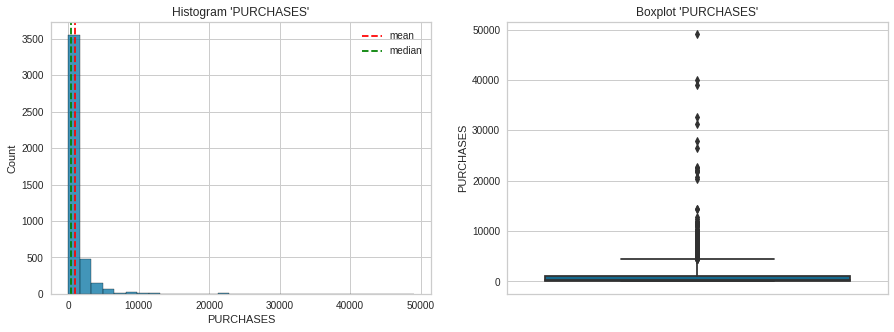

PURCHASES Skewness: 8.902272454100581
Columns 'PURCHASES' right skewed


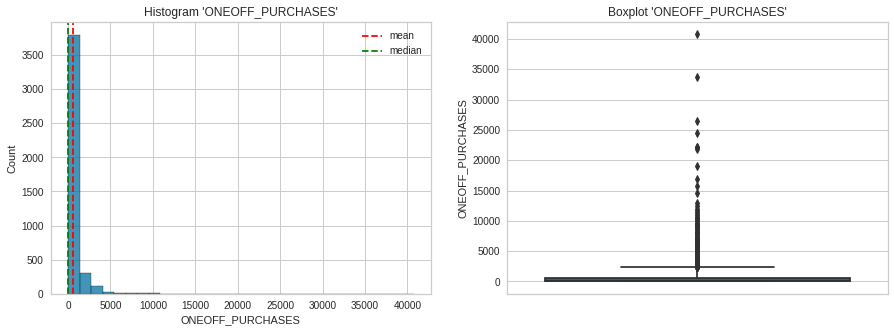

ONEOFF_PURCHASES Skewness: 10.045515316290516
Columns 'ONEOFF_PURCHASES' right skewed


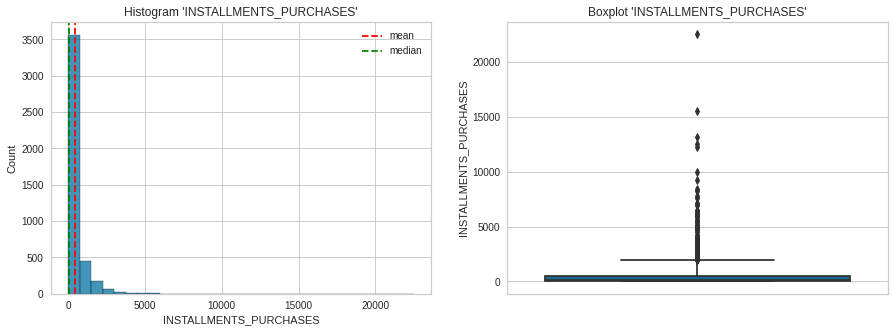

INSTALLMENTS_PURCHASES Skewness: 8.030304885938177
Columns 'INSTALLMENTS_PURCHASES' right skewed


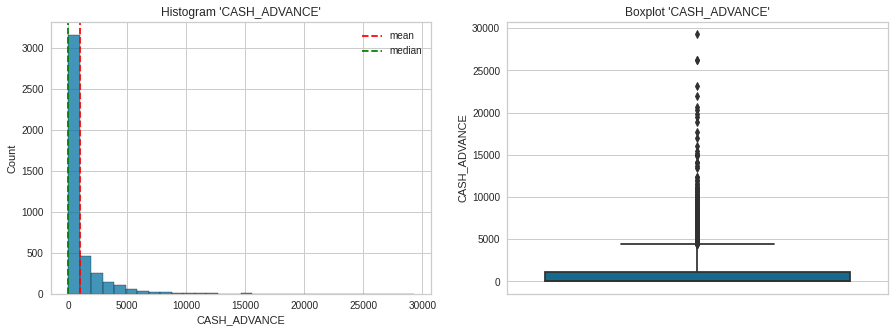

CASH_ADVANCE Skewness: 4.713174552567423
Columns 'CASH_ADVANCE' right skewed


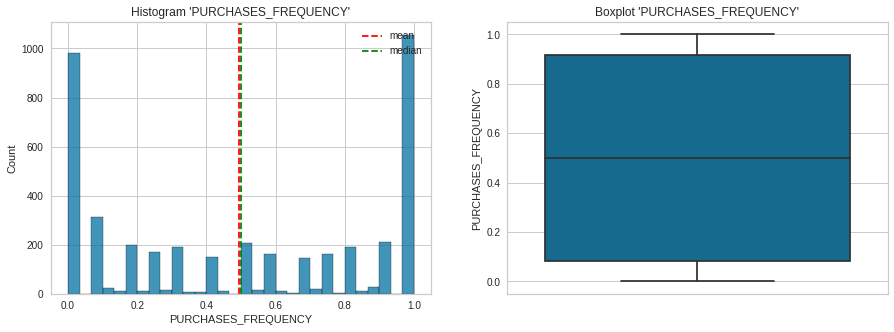

PURCHASES_FREQUENCY Skewness: 0.035641946018049195
Columns 'PURCHASES_FREQUENCY' normal distribution


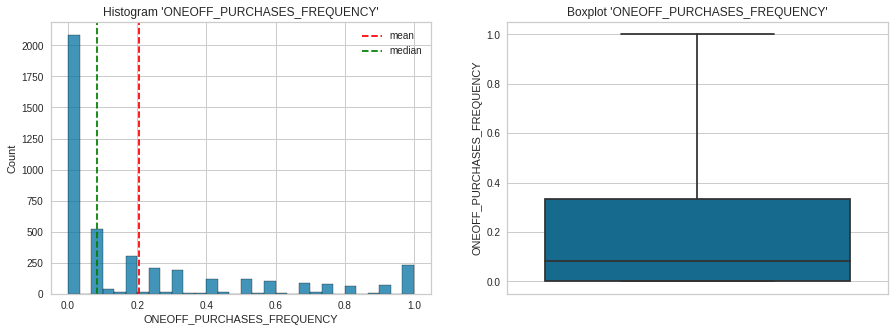

ONEOFF_PURCHASES_FREQUENCY Skewness: 1.49450472491376
Columns 'ONEOFF_PURCHASES_FREQUENCY' right skewed


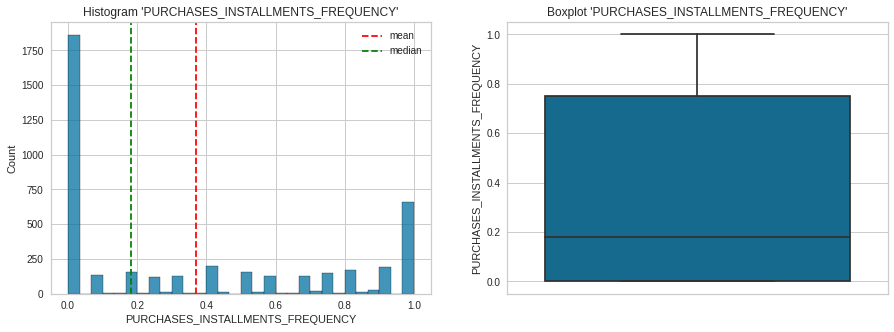

PURCHASES_INSTALLMENTS_FREQUENCY Skewness: 0.4865766900569389
Columns 'PURCHASES_INSTALLMENTS_FREQUENCY' normal distribution


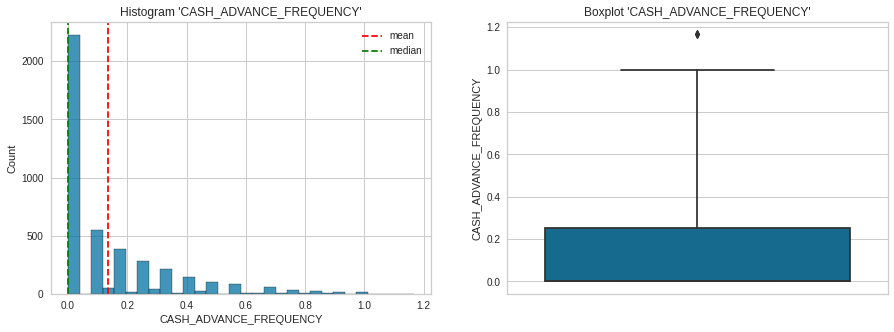

CASH_ADVANCE_FREQUENCY Skewness: 1.7888346981313274
Columns 'CASH_ADVANCE_FREQUENCY' right skewed


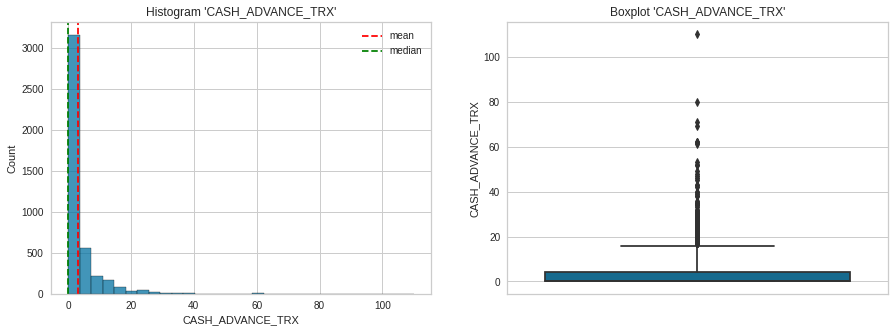

CASH_ADVANCE_TRX Skewness: 4.722877319817404
Columns 'CASH_ADVANCE_TRX' right skewed


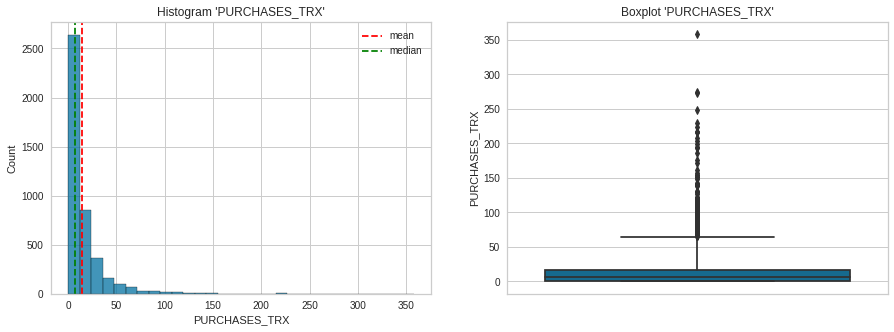

PURCHASES_TRX Skewness: 4.429897311633816
Columns 'PURCHASES_TRX' right skewed


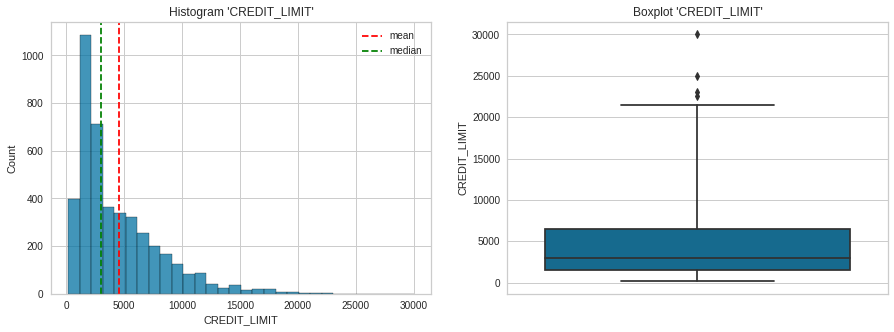

CREDIT_LIMIT Skewness: 1.525378783156858
Columns 'CREDIT_LIMIT' right skewed


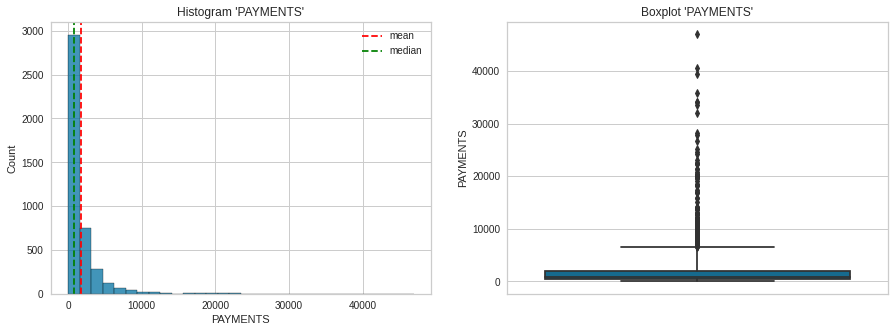

PAYMENTS Skewness: 5.987444897467956
Columns 'PAYMENTS' right skewed


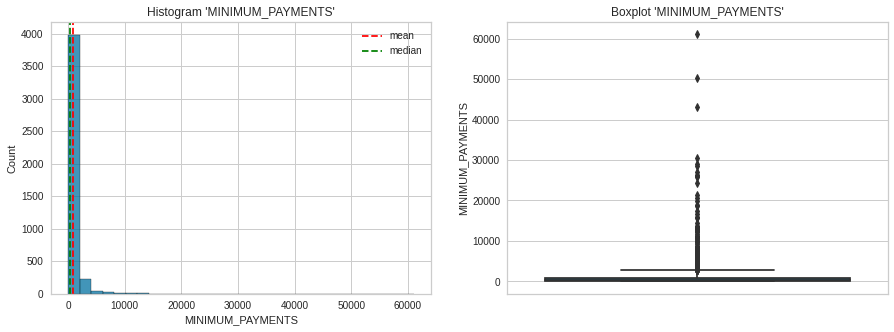

MINIMUM_PAYMENTS Skewness: 12.356757627194938
Columns 'MINIMUM_PAYMENTS' right skewed


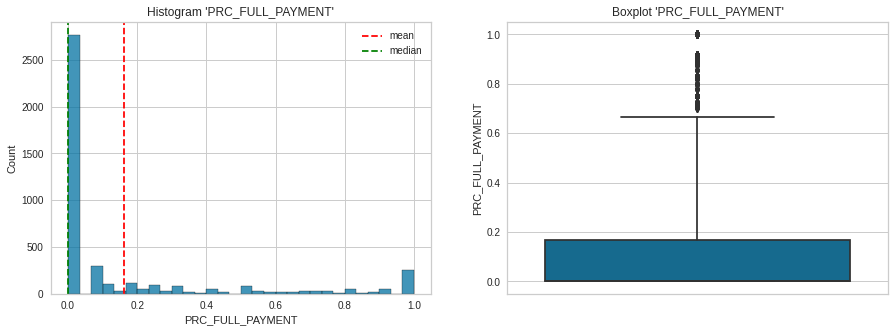

PRC_FULL_PAYMENT Skewness: 1.8543999106579778
Columns 'PRC_FULL_PAYMENT' right skewed


In [ ]:
for i in df_clean:
  plot_dist(df_clean,i)

Setelah dilihat, hampir semua kolom memiliki outlier dan rata rata distribusinya adalah right skewed atau condong ke kanan, unuk penanganan lebih lanjut akan dilakukan pada section handling outlier

## Data Pre-Processing

### Handling Outlier

Melihat Jumlah dan Persentase Outlier

In [ ]:
for k in df_clean:
  Q3 = df_clean[k].quantile(.75)
  Q1 = df_clean[k].quantile(.15)

  IQR = Q3 - Q1

  upper = Q3 + (3 * IQR)
  lower = Q1 - (3 * IQR)

  outlier = df_clean[(df_clean[k] > upper) | (df_clean[k] < lower)]
  print(k)
  print('count of outlier: ', outlier.shape[0])
  print('percent k of outlier: ', outlier.shape[0]/df_clean.shape[0] * 100, '%')
  print('='*70)

BALANCE
count of outlier:  79
percent k of outlier:  1.830398517145505 %
BALANCE_FREQUENCY
count of outlier:  0
percent k of outlier:  0.0 %
PURCHASES
count of outlier:  160
percent k of outlier:  3.707136237256719 %
ONEOFF_PURCHASES
count of outlier:  257
percent k of outlier:  5.954587581093605 %
INSTALLMENTS_PURCHASES
count of outlier:  175
percent k of outlier:  4.054680259499537 %
CASH_ADVANCE
count of outlier:  238
percent k of outlier:  5.514365152919369 %
PURCHASES_FREQUENCY
count of outlier:  0
percent k of outlier:  0.0 %
ONEOFF_PURCHASES_FREQUENCY
count of outlier:  0
percent k of outlier:  0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY
count of outlier:  0
percent k of outlier:  0.0 %
CASH_ADVANCE_FREQUENCY
count of outlier:  2
percent k of outlier:  0.04633920296570899 %
CASH_ADVANCE_TRX
count of outlier:  178
percent k of outlier:  4.1241890639481 %
PURCHASES_TRX
count of outlier:  150
percent k of outlier:  3.4754402224281744 %
CREDIT_LIMIT
count of outlier:  4
percent k of outl

Setelah dilihat jumlah dan persemtase Outliernya, saya memutuskan untuk melakukan handling outlier dengan cara capping dengan threshold persentase outlier diatas 1%

In [ ]:
if outlier.shape[0]/df_clean.shape[0] * 100 > 1:
  wins = Winsorizer(capping_method='iqr', tail='both', fold=3.0)

df_cleaned = wins.fit_transform(df_clean)

Melihat perbandingan Statistik Deskriptif Data sebelum dan sesudah dilakukan handling outlier

In [ ]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4316.0,1600.114511,2107.347942,0.000000,152.877191,916.693628,2112.447004,19043.138560
BALANCE_FREQUENCY,4316.0,0.895236,0.206730,0.000000,0.909091,1.000000,1.000000,1.000000
PURCHASES,4316.0,1025.274057,2241.729131,0.000000,44.662500,379.300000,1149.940000,49039.570000
ONEOFF_PURCHASES,4316.0,600.770438,1690.105736,0.000000,0.000000,35.955000,600.000000,40761.250000
INSTALLMENTS_PURCHASES,4316.0,424.888909,940.627467,0.000000,0.000000,95.845000,498.592500,22500.000000
CASH_ADVANCE,4316.0,986.980658,2159.134558,0.000000,0.000000,0.000000,1110.248526,29282.109150
PURCHASES_FREQUENCY,4316.0,0.495675,0.399564,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,4316.0,0.205447,0.299252,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4316.0,0.369805,0.398217,0.000000,0.000000,0.181818,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,4316.0,0.136236,0.200511,0.000000,0.000000,0.000000,0.250000,1.166667


In [ ]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4316.0,1551.843300,1899.267927,0.000000,152.877191,916.693628,2112.447004,7991.156441
BALANCE_FREQUENCY,4316.0,0.923875,0.133211,0.636364,0.909091,1.000000,1.000000,1.000000
PURCHASES,4316.0,859.382707,1159.646068,0.000000,44.662500,379.300000,1149.940000,4465.772500
ONEOFF_PURCHASES,4316.0,439.349069,705.611531,0.000000,0.000000,35.955000,600.000000,2400.000000
INSTALLMENTS_PURCHASES,4316.0,358.470403,537.750853,0.000000,0.000000,95.845000,498.592500,1994.370000
CASH_ADVANCE,4316.0,798.060602,1316.475278,0.000000,0.000000,0.000000,1110.248526,4440.994105
PURCHASES_FREQUENCY,4316.0,0.495675,0.399564,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,4316.0,0.205447,0.299252,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4316.0,0.369805,0.398217,0.000000,0.000000,0.181818,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,4316.0,0.136159,0.200145,0.000000,0.000000,0.000000,0.250000,1.000000


### Scaling

Melakukan Scaling memakai Standardscaler, karena pada kasus clustering kita membutuhkan standarisasi bukan normalisasi data

In [ ]:
df_cleaned.columns.tolist()

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']

In [ ]:
num_col = ['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']
scaler = StandardScaler()
num_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[num_col]))
num_scaled.columns = num_col

df_cleaned.drop(num_col, axis=1, inplace=True)
df_cleaned = pd.concat([df_cleaned.reset_index(drop=True), num_scaled], axis=1)

Mengecek setelah dilakukan scaling dan concat apakah ada missing values saat di join

In [ ]:
df_cleaned.isnull().sum().sum()

0

### VIF Test

In [ ]:
#Grouping numerical features
vif_nums = ['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']
#finding correlation between features
def calc_vif(vif_cap):

    X = df_cleaned[vif_cap]
    
    # Calculating VIF
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# compute vif 
calc_vif(vif_nums).sort_values('VIF', ascending=False)

,Variable,VIF
2,PURCHASES,23.724608
3,ONEOFF_PURCHASES,14.561142
8,PURCHASES_INSTALLMENTS_FREQUENCY,11.769853
6,PURCHASES_FREQUENCY,10.837530
4,INSTALLMENTS_PURCHASES,7.974194
10,CASH_ADVANCE_TRX,6.628070
7,ONEOFF_PURCHASES_FREQUENCY,6.124120
9,CASH_ADVANCE_FREQUENCY,5.918842
11,PURCHASES_TRX,5.277920
0,BALANCE,4.837963


Berdasarkan nilai VIF nya, dengan threshold saya yang akan mengambil nilai VIF dibawah saya bisa mereduksi kolom menjadi 7 feature. Namun hal ini masih perlu didukung oleh perhitungan PCA nanti.

### Feature Selection

Mengambil feature berdasarkan nilai VIF yang sudah dilakukan perhitungan sebelumnya

In [ ]:
df_final = df_cleaned[[
    'BALANCE_FREQUENCY',
    'CASH_ADVANCE',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'PRC_FULL_PAYMENT',
    'BALANCE',
    'MINIMUM_PAYMENTS'
]]

In [ ]:
df_final.head()

,BALANCE_FREQUENCY,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,BALANCE,MINIMUM_PAYMENTS
0,-0.366945,-0.60628,-0.959377,-0.797746,-0.5865,-0.320297,-0.314509
1,0.571526,-0.60628,-0.959377,-0.771860,-0.5865,-0.574176,-0.670409
2,0.571526,-0.60628,-0.823144,-0.687573,-0.5865,-0.262368,-0.566651
3,0.571526,-0.60628,-0.550676,-0.720296,-0.5865,0.360915,0.101508
4,-2.158568,-0.60628,-0.904884,-0.893551,-0.5865,-0.593376,-0.801026


### PCA

In [ ]:
pca_scaled=PCA(n_components=7).fit(df_final)
pca_scaled.explained_variance_ratio_

array([0.42344848, 0.19701605, 0.12316147, 0.09211916, 0.07663783,
       0.06749732, 0.02011968])

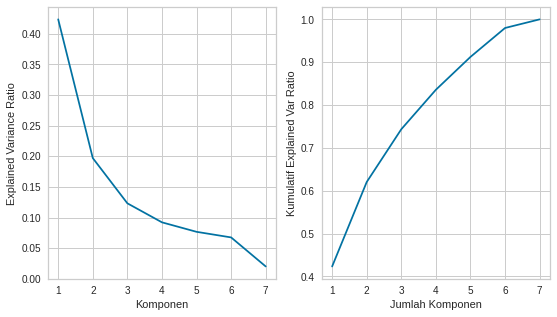

In [ ]:
ig,ax=plt.subplots(ncols=2,figsize=(9,5))
ax[0].plot(range(1,8),pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,8),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

In [ ]:
pca = PCA(n_components=4).fit(df_final)

Jika dilihat berdasarkan grafik nya, garis patahan terletak saat nilai k 
berada pada k=4 dan dan berdasarkan grafik EVR, pada nilai k=4 sudah mencapai nilai 85% yang artinya sudah mencakup 85% dari data.

In [ ]:
pca.explained_variance_ratio_

array([0.42344848, 0.19701605, 0.12316147, 0.09211916])

In [ ]:
pca.fit(df_final)

pca_df = pca.transform(df_final)

In [ ]:
pca_df

array([[-1.11331218, -1.02006871,  0.41477208,  0.17292177],
       [-1.17845481, -1.26337208, -0.31638466, -0.32220189],
       [-0.88680345, -1.20961121, -0.34046486, -0.1932247 ],
       ...,
       [ 1.7558061 , -0.1554041 , -0.00466354,  0.56034852],
       [ 3.31683424, -0.64316294,  0.96327694, -0.52167922],
       [ 1.76961314,  0.29218689,  0.91155699, -1.98880883]])

## Model Definition

Pendefinisian model dengan KMeans, Agglomerative, dan Spectral. Namun sebelum mendefinisikan model, dilakukan pencarian jumlah komponen dengan metode elbow dan silhoutte diagram

### Elbow Method

#### Distortion Score Based

In [ ]:
model1 = KMeans()

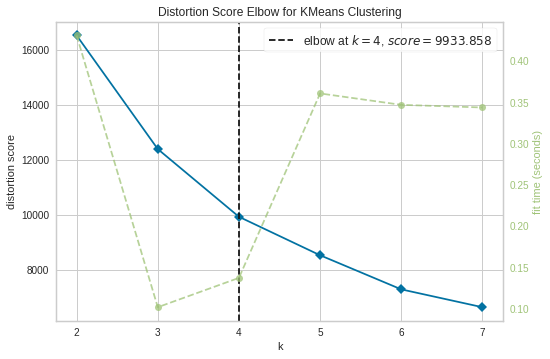

In [ ]:
k = [2,3,4,5,6,7,8]
visualizer = KElbowVisualizer(model1, k=(2,8))
visualizer.fit(pca_df)        # Fit the data to the visualizer
visualizer.show()

#### Silhoutte Score Based

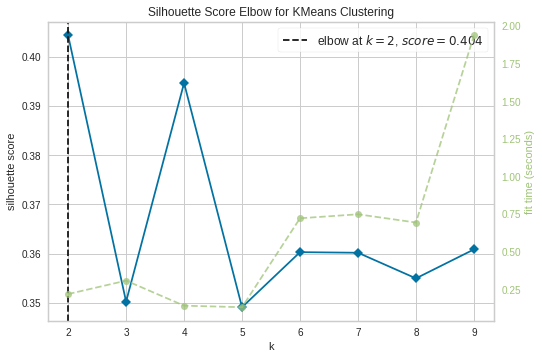

In [ ]:
model2 = KMeans(random_state=42, max_iter = 300)
visualizer = KElbowVisualizer(model2, k=(2,10), metric='silhouette')

visualizer.fit(pca_df)
visualizer.show()
plt.show()

jika dilihat dari elbow method yang berdasarkan metric silhoutte dan distortion score, terlihat perbedaan nilai k. Namun saya akan mengambil k=4 karena pada distortion perbedaan nilai 2 dengan 4 berbeda, sedangkan pada silhoutte score perbedaan nilai 2 dengan 4 tidak terlalu jauh, saya akan mengambil yang nilai perbedannya signifikan

### Silhouette Diagram

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=99).fit(pca_df)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

silhouette_scores = [silhouette_score(pca_df, model.labels_)
                     for model in kmeans_per_k[1:]]

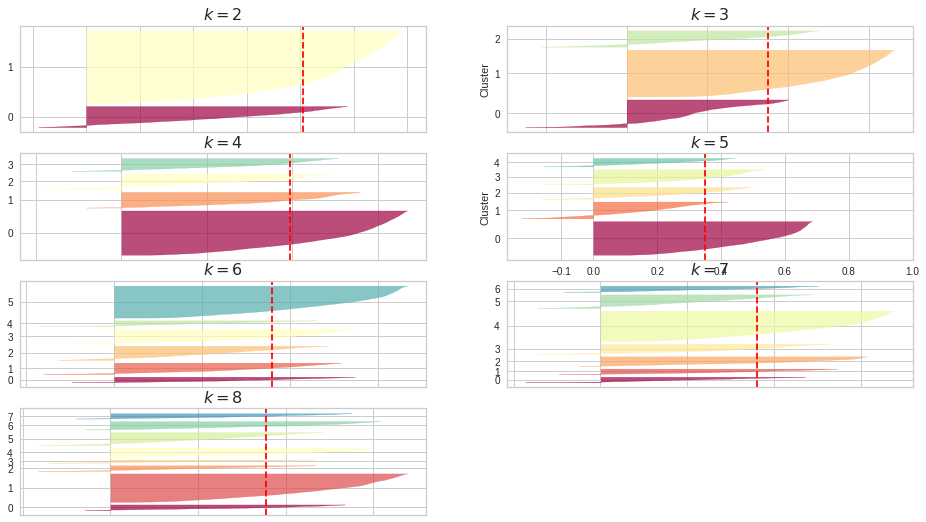

In [ ]:
plt.figure(figsize=(16, 9))

for k in (2,3,4,5,6,7,8):
    plt.subplot(4,2,k-1)

    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(pca_df, y_pred)

    padding = len(pca_df) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = pl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
        facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3,5):
        plt.ylabel('Cluster')
    if k in (5,10):
        plt.gca().set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
        plt.xlabel('Silhouette Coefficient')
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title('$k={}$'.format(k), fontsize=16)

plt.show()

Jika dilihat dari Silhoutte diagram, dapat dilihat bahwa nilai k=4 memiliki pembagian clustering yang paling baik menurut asumsi pribadi. Maka dari itu, saya akan tetap mengambil jumlah komponen 4

## Model Training

### KMeans

In [ ]:
kmeans_full = KMeans(n_clusters=4,random_state=99)

kmeans_full.fit(pca_df)

print('inertia : ', kmeans_full.inertia_)

inertia :  9933.857857266672


In [ ]:
kmeans_full.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

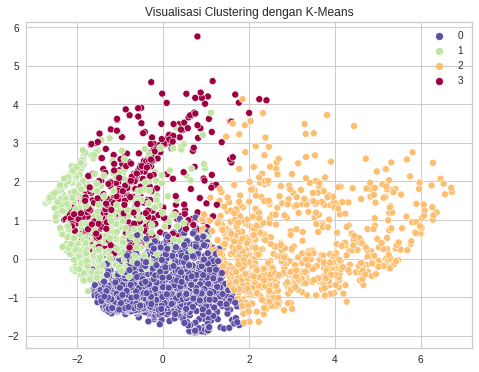

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=pca_df[:,0], y=pca_df[:,1], hue=kmeans_full.labels_, palette='Spectral_r')
ax.set_title('Visualisasi Clustering dengan K-Means');

### AgglomerativeClustering

In [ ]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg.fit(pca_df)

AgglomerativeClustering(n_clusters=4)

In [ ]:
agg.labels_

array([2, 2, 2, ..., 0, 0, 0])

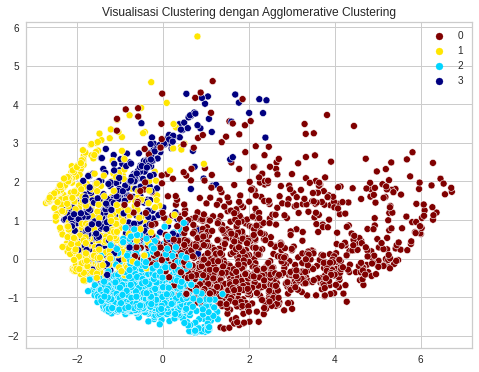

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=pca_df[:,0], y=pca_df[:,1], hue=agg.labels_, palette='jet_r')
ax.set_title('Visualisasi Clustering dengan Agglomerative Clustering');

### Spectral CLustering

In [ ]:
scl = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')
scl.fit(pca_df)

SpectralClustering(affinity='nearest_neighbors', n_clusters=4)

In [ ]:
scl.labels_

array([3, 0, 0, ..., 1, 1, 1], dtype=int32)

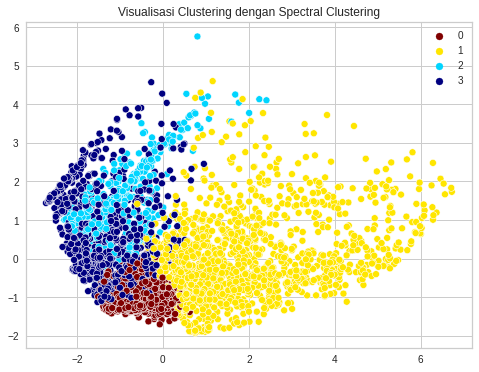

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=pca_df[:,0], y=pca_df[:,1], hue=scl.labels_, palette='jet_r')
ax.set_title('Visualisasi Clustering dengan Spectral Clustering');

Setelah dilakukan training pada ketiga model, dapat dilihat bahwa semua cluster belum terpisah dengan baik karena masing masing cluster masih ada yang saling overlap atau bertabrakan. Maka dari itu saya akan mengambil model yang terbaik berdasarkan scoring pada section Model Comparison.

## Model Comparison

In [ ]:
compare_result = pd.DataFrame({'Method' : ['K-Means', 'Agglomerative', 'Spectral'],
                  'Silhouete Score' : [silhouette_score(pca_df, kmeans_full.labels_), silhouette_score(pca_df, agg.labels_), silhouette_score(pca_df, scl.labels_)],
                  'Davies-Bouldin Index' : [davies_bouldin_score(pca_df, kmeans_full.labels_), davies_bouldin_score(pca_df, agg.labels_), davies_bouldin_score(pca_df, scl.labels_)],
                  'Calinski-Harabasz Index' : [calinski_harabasz_score(pca_df, kmeans_full.labels_), calinski_harabasz_score(pca_df, agg.labels_), calinski_harabasz_score(pca_df, scl.labels_)]})
compare_result

,Method,Silhouete Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,K-Means,0.394656,0.979725,2216.030329
1,Agglomerative,0.343756,1.027009,1814.832615
2,Spectral,0.285194,1.046056,1643.725423


Dapat dilihat dari perbandingan ketiga model, model KMeans memiliki nilai yang paling bagus baik itu dari silhoutte score(paling tinggi dari ketiga model), Davies Bouldin Index (paling kecil dari ketiga model), dan Calinski Harabasz Index (paling tinggi dari ketiga model)

## Model Inference

In [ ]:
inf = df.sample(15, random_state=17)
inf.reset_index(drop=True, inplace=True)
inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,7556,685.063917,1.000000,0.00,0.00,0.00,110.795488,0.000000,0.000000,0.000000,0.250000,4,0,700.0,308.035273,334.274864,0.000000,12
1,3076,2027.896903,1.000000,933.50,933.50,0.00,1160.283340,0.083333,0.083333,0.000000,0.083333,2,1,3000.0,393.417404,462.153221,0.000000,12
2,118,3985.637748,1.000000,20.00,20.00,0.00,1306.183990,0.083333,0.083333,0.000000,0.333333,5,1,6000.0,1203.180838,1148.848564,0.000000,12
3,6480,2080.312991,0.888889,25.00,0.00,25.00,2422.889589,0.111111,0.000000,0.111111,0.333333,6,1,2500.0,540.687217,570.576789,0.000000,9
4,5600,91.029575,1.000000,1055.70,0.00,1055.70,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,5000.0,1083.300243,163.891113,1.000000,12
5,7618,212.080181,1.000000,618.00,333.00,285.00,0.000000,0.500000,0.083333,0.333333,0.000000,0,7,6000.0,378.383325,169.341588,0.000000,12
6,3994,1337.162883,1.000000,4544.48,2384.44,2160.04,0.000000,0.750000,0.083333,0.666667,0.000000,0,25,7500.0,3394.950090,380.300298,0.083333,12
7,8300,90.084324,1.000000,1098.82,1098.82,0.00,181.725242,0.583333,0.583333,0.000000,0.083333,1,13,3000.0,1307.140981,141.008201,0.428571,12
8,2654,4694.671605,1.000000,0.00,0.00,0.00,4174.716471,0.000000,0.000000,0.000000,0.500000,14,0,12000.0,8919.228234,1075.889659,0.000000,12
9,5190,1855.212121,1.000000,32.22,32.22,0.00,37.743145,0.083333,0.083333,0.000000,0.083333,1,1,2000.0,349.584645,695.503633,0.000000,12


In [ ]:
inf.columns.tolist()

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [ ]:
inf_cleaned = inf[[
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT']]

In [ ]:
if outlier.shape[0]/df_clean.shape[0] * 100 > 1:
  inf_cleaned = wins.transform(inf_cleaned)

In [ ]:
num_scaled_inf = pd.DataFrame(scaler.transform(inf_cleaned[num_col]))
num_scaled_inf.columns = num_col

inf_cleaned.drop(num_col, axis=1, inplace=True)
inf_cleaned = pd.concat([inf_cleaned.reset_index(drop=True), num_scaled_inf], axis=1)

In [ ]:
inf_final = inf_cleaned[['BALANCE_FREQUENCY','CASH_ADVANCE',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'PRC_FULL_PAYMENT',
    'BALANCE',
    'MINIMUM_PAYMENTS']]

In [ ]:
pca_inf = pca.transform(inf_final)

In [ ]:
kmeans_full.predict(pca_inf)

array([0, 0, 0, 0, 3, 0, 3, 3, 2, 0, 0, 0, 2, 0, 2], dtype=int32)

Model clustering K-Means yang dibuat juga sudah bisa untuk melakukan clustering data baru.

## Exploratory Data Analysis (Clustering Section)

In [ ]:
df_clean['label'] = kmeans_full.labels_

In [ ]:
df_clean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,label
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,0
3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,0
4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,0
5,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,0
7,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,0
4471,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,2
4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,2
4473,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,2


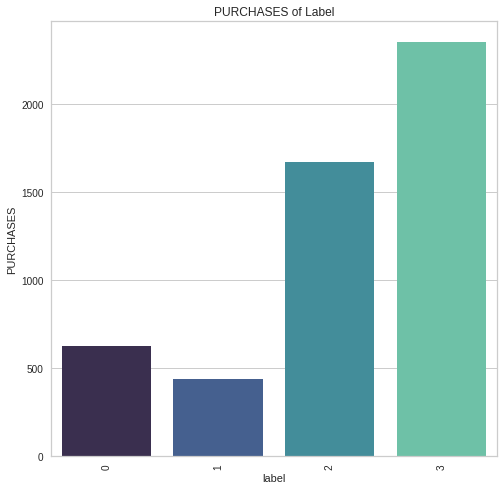

In [ ]:
all = df_clean.groupby('label')[['PURCHASES']].mean()
all = all.reset_index()

plt.figure(figsize=(8,8))
sns.barplot(x='label', y='PURCHASES', data=all, palette='mako')
plt.title('PURCHASES of Label')
plt.xticks(rotation = 90);

Dapat dilihat dari EDA diatas bahwa:
- Label 0: Customer yang melakukan transaksi dengan jumlah rendah
- Label 1: Customer yang melakukan transaksi dengan jumlah sangat rendah
- Label 2: Customer yang melakukan transaksi dengan jumlah tinggi
- Label 3: Customer yang melakukan transaksi dengan jumlah sangat tinggi 

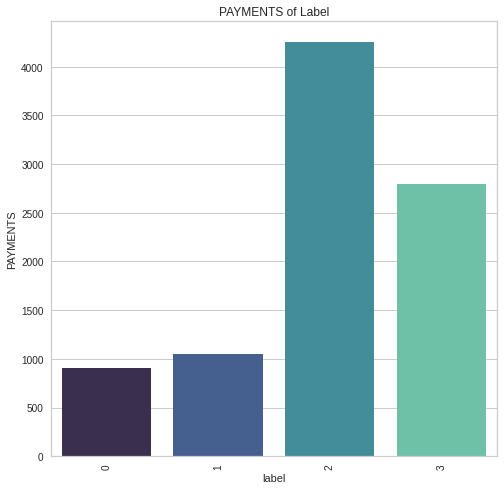

In [ ]:
all = df_clean.groupby('label')[['PAYMENTS']].mean()
all = all.reset_index()

plt.figure(figsize=(8,8))
sns.barplot(x='label', y='PAYMENTS', data=all, palette='mako')
plt.title('PAYMENTS of Label')
plt.xticks(rotation = 90);

Dapat dilihat dari EDA diatas bahwa:
- Label 0: Customer yang melakukan pembayaran dengan jumlah sangat rendah
- Label 1: Customer yang melakukan pembayaran dengan jumlah rendah
- Label 2: Customer yang melakukan pembayaran dengan jumlah sangat tinggi
- Label 3: Customer yang melakukan pembayaran dengan jumlah tunggi

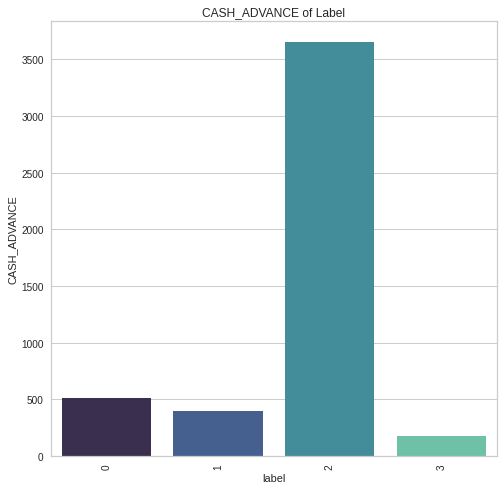

In [ ]:
all = df_clean.groupby('label')[['CASH_ADVANCE']].mean()
all = all.reset_index()

plt.figure(figsize=(8,8))
sns.barplot(x='label', y='CASH_ADVANCE', data=all, palette='mako')
plt.title('CASH_ADVANCE of Label')
plt.xticks(rotation = 90);

Dapat dilihat dari EDA diatas bahwa:
- Label 0: Customer yang melakukan penarikan dari kartu kredit dengan jumlah tidak terlalu banyak
- Label 1: Customer yang melakukan penarikan dari kartu kredit dengan jumlah sedikit
- Label 2: Customer yang melakukan penarikan dari kartu kredit dengan jumlah sangat banyak
- Label 3: Customer yang melakukan penarikan dari kartu kredit dengan jumlah sangat sedikit

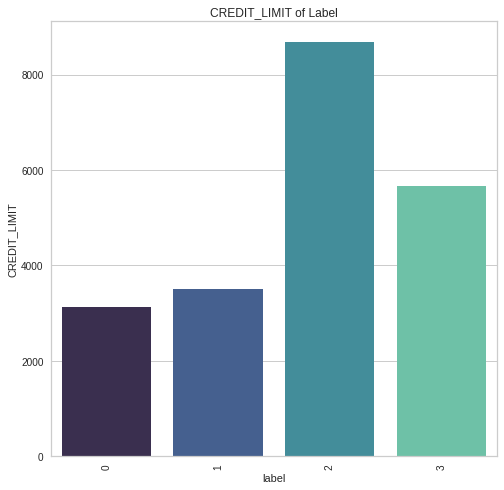

In [ ]:
all = df_clean.groupby('label')[['CREDIT_LIMIT']].mean()
all = all.reset_index()

plt.figure(figsize=(8,8))
sns.barplot(x='label', y='CREDIT_LIMIT', data=all, palette='mako')
plt.title('CREDIT_LIMIT of Label')
plt.xticks(rotation = 90);

Dapat dilihat dari EDA diatas bahwa:
- Label 0: Customer dengan limit kredit yang sangat rendah
- Label 1: Customer dengan limit kredit yang rendah
- Label 2: Customer dengan limit kredit yang sangat tinggi
- Label 3: Customer dengan limit kredit yang tinggi

## Conclusion

Jika kita lihat dari hasil Clustering
dapat dikategorikan bahwa:
- Label 0: customer dengan limit yang paling rendah sehingga customer tersbut juga melakukan pembayaran dan transaksi dengan jumlah yang rendah, selain itu customer juga tidak terlalu banyak melakukan penarikan uang

- Label 1: customer dengan limit yang cukup rendah sehingga customer tersebut juga hampit sama dengan customer pada label 0 yaitu melakukan pembayaran dan transaksi dengan jumlah rendah, tidak hanya itu, customer juga melakukan penarikan uang paling sedikit daripada segmentasi customer yang lain

- Label 2: Customer dengan limit kredit paling tinggi dan sesuai dengan limitnya, customer ini juga melakukan pembayaran dan penarikan uang yang paling banyak jumlahnya, dan juga melakukan transaksi dengan jumlah yang banyak

- Label 3: Customer dengan limit kredit tinggi tapi tidak setinggi customer label 2, namun memiliki transaksi dengan jumlah yang paling tinggi tetapi melakukan penarikan uang paling sedikit, tapi sesuai dengan jumlah limitnya, pembayaran yang dilakukan jumlahnya tinggi.

Sehingga dari clustering diatas, customer pada bank ini semuanya memiliki tanggung jawab yang cukup baik dalam penggunaan kartu kredit, dimana customer yang memiliki limit kredit rendah memiliki kesadaran yang baik dalam mengguanakan kartu kredit, dimana mereka menggunakan kartu kredit sesuai dengan kapasitasnya. Sedangkan pada customer yang memiliki limit kredit yang tinggi, mereka menggunakan sesuai kapasitasnya, melakukan pembayaran,penarikan, dan transaksi sesuai dengan limit kartu kreditnya. 

## Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Pada kmeans, kita menghitung jarak dari setiap data ke setiap centroid dan nilai inertia didapatkan dari menghitung jaraknya lalu dirata-ratakan(inertia yang semakin kecil semakin baik kmeansnya). Inertia meminimumkan jarak antara data-data dengan centroid dalam suatu pembagian cluster.

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow Method adalah metode untuk menentukan jumlah komponen atau jumlah cluster pada modeling KMeans. Cara menggunakannya adalah membuat grafik plot dengan melihat perbandingan nilai k dan nilai inersia nya, untuk mengetahui nilai k (jumlah cluster) yang terbaij dengan elbow method, kita melihat patahan yang paling signifikan pada grafik. Kekurangannya adalah elbow method masih bersifat subjektif karena perspektif setiap orang dalam melihat patahan di grafik bisa berbeda sehingga mencari nilai k yang terbaik terkadang masih harus divalidasi melalui metode lainnya (contohnya adalah silhoutte diagram), namun kelebihan elbow method adalah metode ini sering sekali digunakan kebanyakan orang karena kemudahan dalam penggunaannya

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

Perbedaan K-Means (Centroid-Based Clustering) dengan Agglomerative Clustering (Hierarchical Clustering) dan Spectral Clustering adalah K-Means membutuhkan masukan jumlah cluster diawal sedangkan Agglomerative dan Spectral tidak perlu. K-Means unggul untuk data yang persebarannya spherical saja, berbeda dengan Agglomerative dan Spectral yang lebih fleksibel untuk persebaran datanya. Agglomerative unggul untuk pengelompokkan yang memiliki tingkatan sedangkan K-Means dan Spectral cocok untuk cluster dengan level yang sama.